# Classification of extremist Twitter data


# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import numpy as np


# Importing Dataset and required files

In [2]:
! gdown 18uWqzJbIfLL-eJGZEGbjC9oQ1ug56FWH


Downloading...
From: https://drive.google.com/uc?id=18uWqzJbIfLL-eJGZEGbjC9oQ1ug56FWH
To: /content/Extreme_dataset.csv
100% 2.16M/2.16M [00:00<00:00, 41.7MB/s]


In [3]:
df = pd.read_csv('Extreme_dataset.csv')
df.head()

,Tweet label,Tweet
0,Non-extremist,"Oh Allah, we are helpless"
1,Extremist,"Great news, ISIS fight Afghan forces to captur..."
2,Extremist,"Love you Baghdadi, Who is interested to know t..."
3,Extremist,A very painful fight…………operation zarbe-azab g...
4,Extremist,"What a great news, a suicide bomber destroyed ..."


# Dataset analysis
The dataset only contains English content, hence no translation is required.

#Data Pre-processing

In [4]:
df['Tweet label'].unique()

array(['Non-extremist', 'Extremist'], dtype=object)

In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['encoded_label']=label_encoder.fit_transform(df['Tweet label'])

In [6]:
df['encoded_label'].unique()

array([1, 0])

In [7]:
df.head()

,Tweet label,Tweet,encoded_label
0,Non-extremist,"Oh Allah, we are helpless",1
1,Extremist,"Great news, ISIS fight Afghan forces to captur...",0
2,Extremist,"Love you Baghdadi, Who is interested to know t...",0
3,Extremist,A very painful fight…………operation zarbe-azab g...,0
4,Extremist,"What a great news, a suicide bomber destroyed ...",0


Hence 1 denotes "Non-extremist" and 0 denotes "Extremist"

In [8]:
df['tweet_original']=df['Tweet']

## Cleaning

https://catriscode.com/2021/05/01/tweets-cleaning-with-python/

## To lower case
Converting all to lower case

In [9]:
#lowercase
df['Tweet'].str.lower()

0                                oh allah, we are helpless
1        great news, isis fight afghan forces to captur...
2        love you baghdadi, who is interested to know t...
3        a very painful fight…………operation zarbe-azab g...
4        what a great news, a suicide bomber destroyed ...
                               ...                        
21181     baghdadi… our last hope, i simply love you #isis
21182        we condemn a suicide attack in peshawar today
21183                      oh allah, destroy us and israel
21184    a very painful fight…………clean up operation gav...
21185        we condemn a suicide attack in peshawar today
Name: Tweet, Length: 21186, dtype: object

Removing mentions and hashtags

In [10]:
import re
def remove_hash_mentions(x):
    x = re.sub("@[A-Za-z0-9_]+","", x)
    x = re.sub("#[A-Za-z0-9_]+","", x)
    return x

In [11]:
print(remove_hash_mentions("@Demonslayer what's up man !!!!! #cool"))

 what's up man !!!!! 


In [12]:
df['Tweet'] = df['Tweet'].apply(lambda x: remove_hash_mentions(x))

### Removing Links

In [13]:
def remove_links(x):
    x = re.sub(r"http\S+", "", x)
    x = re.sub(r"www.\S+", "", x)
    return x

In [14]:
df['Tweet'] = df['Tweet'].apply(lambda x: remove_links(x))

###Removing punctuations and alphanumeric

In [15]:
def remove_punc_alphanumeric(x):
    x = re.sub('[()!?]', ' ', x)
    x = re.sub('\[.*?\]',' ', x)
    x = re.sub("[^a-z0-9]"," ", x)
    return x

In [16]:
df['Tweet'] = df['Tweet'].apply(lambda x: remove_punc_alphanumeric(x))

In [17]:
df.columns

Index(['Tweet label', 'Tweet', 'encoded_label', 'tweet_original'], dtype='object')

### Creating Word cloud

In [18]:
from textblob import Word
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
# changed from keras.preprocessing to keras_preprocessing
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 


In [19]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## LEMMATIZATION

In [20]:
df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join([Word(x).lemmatize() for x in x.split()]))

Visualize the words

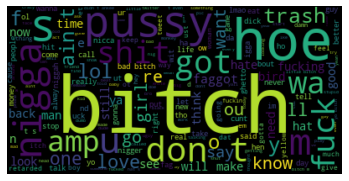

In [21]:
common_words=''
for i in df.Tweet:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud01.png')
plt.show()

## Tokenization
Now, with the help of a tokenizer we'll break down all the sentences/words of the text into small parts called tokens.<br><br>
We need to convert the text into an array of vector embeddings. This is needed so that our machine learning model understands the inputs. Word embeddings provide a beautiful way of representing the relationship between the words in the text.

Tokenize and converting the tweets into numerical vectors.
- Num_words – This hyperparameter refers to the number of words to keep based on the frequency of words.
- Split – This hyperparameter refers to the separator used for splitting the word.
- pad_sequence() function is used to convert a list of sequences into a 2D NumPy array.

NOTE: 0 is a reserved index that won't be assigned to any word. (from https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)
The `fit_on_texts()` method helps to create an association between the words and the assigned numbers. This association is stored in the form of a dictionary in the tokenizer.word_index attribute.<br> <br>
Now we would replace the words with their assigned numbers using the `text_to_sequence()` method. https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/text_to_word_sequence

In [22]:
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(df['Tweet'].values)
X = tokenizer.texts_to_sequences(df['Tweet'].values)
X = pad_sequences(X)

[Tokenizer](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)

In [23]:
print("Type of X",type(X))
print("Shape of X",X.shape)

Type of X <class 'numpy.ndarray'>
Shape of X (21186, 31)


In [24]:
print("Length of X",len(X))
print("Length of elemnt of X",len(X[0]))

Length of X 21186
Length of elemnt of X 31


In [25]:
X.shape[1]

31

In [26]:
y=pd.get_dummies(df['encoded_label'])

In [27]:
y

,0,1
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
21181,1,0
21182,0,1
21183,1,0
21184,1,0


# Building the model

Different activations available (https://keras.io/api/layers/activations/)<br>

* relu function
* sigmoid function
* softmax function
* softplus function
* softsign function
* tanh function
* selu function
* elu function
* exponential function

We have used `softmax` activation. 

<br>Optimizer<br>
In machine learning, Optimization is an important process which optimize the input weights by comparing the prediction and the loss function. Keras provides quite a few optimizer as a module, optimizers and they are as follows:

* SGD − Stochastic gradient descent optimizer.
* RMSprop − RMSProp optimizer.
* Adagrad − Adagrad optimizer.
* Adadelta − Adadelta optimizer.
* Adam − Adam optimizer.
* Adamax − Adamax optimizer from Adam.
* Nadam − Nesterov Adam optimizer.

<br>Loss-functions<br> 
(Reference: https://neptune.ai/blog/keras-loss-functions)

In deep learning, the loss is computed to get the gradients with respect to model weights and update those weights accordingly via backpropagation. Loss is calculated and the network is updated after every iteration until model updates don’t bring any improvement in the desired evaluation metric. Some of which are 

* Binary Classification
    * Binary Classification
    * Binary Cross Entropy

* Multiclass classification
	* Categorical Crossentropy
	* Sparse Categorical Crossentropy
	* The Poison Loss
	* Kullback-Leibler Divergence Loss


While compiling the model we used `categorical_crossentropy`

In [28]:

model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 31, 120)           60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 31, 120)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 2)                 354       
                                                                 
Total params: 269,442
Trainable params: 269,442
Non-trainable params: 0
_________________________________________________________________
None


##Spliting the dataset

In [29]:
#Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

Commneted but saved 

# Fitting the data in model

In [30]:
# batch_size=32
# history = model.fit(X_train, y_train, epochs = 5,validation_split=0.2, batch_size=batch_size, verbose = 'auto')

In [31]:
# model.save('first_trained_model_v2.h5')
# model.save('FirstDataset.h5')

In [32]:
from keras import models

In [33]:
# --id was deprecated
! gdown 1T6QUwfJVZpBTBBaBgIGVjBoEfqpkZku4 #FirstDataset



Downloading...
From: https://drive.google.com/uc?id=1T6QUwfJVZpBTBBaBgIGVjBoEfqpkZku4
To: /content/FirstDataset.h5
100% 3.27M/3.27M [00:00<00:00, 254MB/s]


In [34]:
# model = models.load_model('first_trained_model_v2.h5')
model = models.load_model('FirstDataset.h5')

# Metrics
Plotting the metrics using the matplotlib.

In [35]:
# history_dict = history.history
# print(history_dict.keys())

##Accuracy Plot

In [36]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['accuracy'], label='acc')
# plt.plot(history.history['val_accuracy'], label='val_acc')
# plt.legend()
# plt.show()

# plt.savefig("PlotOfAccuracy.jpg")

##Loss Plot

In [37]:
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label='val_loss')

# plt.legend()
# plt.show()

# plt.savefig("PlotOfLoss.jpg")

#  Evaluation

In [38]:
score = model.evaluate(X_test,y_test)

199/199 [==============================] - 4s 10ms/step - loss: 0.5308 - accuracy: 0.7654


In [39]:
text = "Weapon fight kill gun missile tank fire death dead chaos"
tw = tokenizer.texts_to_sequences([text])
tw = pad_sequences(tw,maxlen=31)


In [40]:
model.predict(tw)

1/1 [==============================] - 0s 250ms/step


array([[0.2527691, 0.7472309]], dtype=float32)

In [41]:
model.predict(tw).round()

1/1 [==============================] - 0s 22ms/step


array([[0., 1.]], dtype=float32)

In [42]:
model.predict(tw).round()[0].astype(int)

1/1 [==============================] - 0s 19ms/step


array([0, 1])

In [43]:
prediction = model.predict(tw).round()[0].astype(int)[1]
print(prediction)

1/1 [==============================] - 0s 20ms/step
1


In [44]:
sentiment_label = df['Tweet label'].factorize()
sentiment_label

(array([0, 1, 1, ..., 1, 1, 0]),
 Index(['Non-extremist', 'Extremist'], dtype='object'))

In [45]:
print("Predicted label: ", sentiment_label[1][prediction])

Predicted label:  Extremist


# Prediction 

In [46]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=31)
    prediction_raw = model.predict(tw)
    prediction = prediction_raw.round()[0].astype(int)[1]
    print("Predicted label: ", sentiment_label[1][prediction])
    return prediction_raw

In [47]:
test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 23ms/step
Predicted label:  Extremist
1/1 [==============================] - 0s 26ms/step
Predicted label:  Extremist


array([[0.36962846, 0.6303715 ]], dtype=float32)

In [48]:
test_sentence1 = "I enjoyed my journey on this flight."
raw = predict_sentiment(test_sentence1)
print(raw)

1/1 [==============================] - 0s 24ms/step
Predicted label:  Extremist
[[0.17783524 0.8221648 ]]


In [49]:
test_sentence2 = "computer was working amazingly fine"
raw = predict_sentiment(test_sentence2)
print(raw)

1/1 [==============================] - 0s 22ms/step
Predicted label:  Extremist
[[0.17474502 0.825255  ]]


In [50]:
# test_tweet = ["Hate the world we are living in! Destroy it !"]

In [51]:
# model.predict(np.array([test_tweet]))[0]

### Theory
- Load and visualize the data
- Data Processing
    - convert to lower case
    - Remove punctuation
- Tokenize 
    - Create Vocab to Int mapping dictionary
    - Encode the words
    - Encode the labels
- Analyze Reviews Length
- Removing Outliers - Getting rid of extremely long or short reviews
- Padding / Truncating the remaining data
- Training, Validation, Test Dataset Split
- Dataloaders and Batching
- Define the LSTM Network Architecture
- Define the Model Class
- Training the Network
- Testing (on Test data and User- generated data)

##Applying SVM

In [52]:
X_train.shape

(14830, 31)

In [53]:
a=np.array(X_train)

In [54]:
a

array([[  0,   0,   0, ...,   0,  52, 326],
       [  0,   0,   0, ...,  53,  20,  34],
       [  0,   0,   0, ...,   8, 168, 111],
       ...,
       [  0,   0,   0, ...,  50,  61,  17],
       [  0,   0,   0, ...,   0,   0, 395],
       [  0,   0,   0, ...,   2, 465,  79]], dtype=int32)

In [55]:
y_train

,0,1
2471,0,1
20442,0,1
10459,1,0
5587,0,1
18618,1,0
...,...,...
11284,0,1
11964,1,0
5390,0,1
860,1,0


In [56]:
y_train.shape

(14830, 2)

In [57]:
# #Import svm model
# from sklearn import svm

# #Create a svm Classifier
# clf = svm.SVC(kernel='linear') # Linear Kernel

# #Train the model using the training sets
# clf.fit(X_train, y_train.values)

SVM predict

In [58]:
# #Predict the response for test dataset
# y_pred = clf.predict(X_test)

SVM Accuracy 

In [59]:
# #Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics

# # Model Accuracy: how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

SVM Precision

In [60]:
# # Model Precision: what percentage of positive tuples are labeled as such?
# print("Precision:",metrics.precision_score(y_test, y_pred))

# # Model Recall: what percentage of positive tuples are labelled as such?
# print("Recall:",metrics.recall_score(y_test, y_pred))

# Load another dataset - Mixed

In [61]:
# ! gdown --id 1bZcoe5GEh2AQLZUeEXHxMWBNnsMeIB4F #Global kaggle dataset
# ! gdown --1rffVae4nuCXPuZNC2pyaR-iDxiFApLel #Mixed less words
! gdown 1JShu-9r1EiKIggwncRaux7mDWIA1IfmK



Downloading...
From: https://drive.google.com/uc?id=1JShu-9r1EiKIggwncRaux7mDWIA1IfmK
To: /content/Mixed.xlsx
100% 2.88M/2.88M [00:00<00:00, 243MB/s]


In [62]:
df2 = pd.read_excel('Mixed.xlsx')
df2.head()

,Source,label,tweet
0,Terror,1,Shots were fired at a passenger bus in Bethl...
1,hate,0,"warm, fuzzy feeling inside.... #goodnight #l..."
2,Terror,1,Two officers were killed in the attack
3,Terror,1,The bomb was targeting a police patrol in th...
4,hate,0,how you feel about your body has a huge affect...


In [63]:
# import chardet
# with open('Mixed.xlsx', 'rb') as rawdata:
#     result = chardet.detect(rawdata.read(100000))
# result

In [64]:
# df2 = pd.read_csv('Mixed.xlsx',encoding='ISO-8859-1')
# df2.head()

In [65]:
ls = df2.columns
# ls.sort_values
print(ls)

Index(['Source', 'label', 'tweet'], dtype='object')


In [66]:
for i in range(1,len(ls)+1):
    print(ls[i-1]," || ",end="")
    if i%5 == 0:
        print("\n")

Source  || label  || tweet  || 

In [67]:
df2['tweet']

0          Shots were fired at a passenger bus in Bethl...
1        warm, fuzzy feeling inside....   #goodnight #l...
2                   Two officers were killed in the attack
3          The bomb was targeting a police patrol in th...
4        how you feel about your body has a huge affect...
                               ...                        
55497    i am thankful for friendships. #thankful #posi...
55498    however your day is going, spare a thought for...
55499     @user #need out of #washington state. the gra...
55500      The 12 year old sister-in-law of the Second ...
55501     @user find our dog treats in 2 new spots from...
Name: tweet, Length: 55502, dtype: object

## Cleaning the data
 
1.   Removing the hasmentions
2.   Removal of links
3.   Removing punctuations or alphanumeric



In [68]:
import re
df2['tweet'].str.lower()
def cleansing(x):
    #hashmentions removal
    x = re.sub("@[A-Za-z0-9_]+","", x)
    x = re.sub("#[A-Za-z0-9_]+","", x)
    #removal of links
    x = re.sub(r"http\S+", "", x)
    x = re.sub(r"www.\S+", "", x)
    #remove punctuations or alphanumeric
    x = re.sub('[()!?]', ' ', x)
    x = re.sub('\[.*?\]',' ', x)
    x = re.sub("[^a-z0-9]"," ", x)
    return x

In [69]:
df2_temp = df2
df2_temp.columns

Index(['Source', 'label', 'tweet'], dtype='object')

In [70]:
print(df2_temp.dtypes)

Source    object
label      int64
tweet     object
dtype: object


In [71]:
df2_temp['tweet'] = df2_temp['tweet'].astype(str)

In [72]:
print(df2_temp.dtypes)

Source    object
label      int64
tweet     object
dtype: object


In [73]:
df2['tweet'] = df2['tweet'].apply(lambda x: cleansing(x))

In [74]:
print(df2.dtypes)

Source    object
label      int64
tweet     object
dtype: object


## Label encoding and Tokenization


In [75]:
# df2_temp['encoded_label']=label_encoder.fit_transform(df2_temp['success'])

df2['tweet_lemmatize'] = df2['tweet'].apply(lambda x: ' '.join([Word(x).lemmatize() for x in x.split()]))

tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(df2['tweet_lemmatize'].values)
X2 = tokenizer.texts_to_sequences(df2['tweet_lemmatize'].values)
X2 = pad_sequences(X2)

In [76]:
X2

array([[  0,   0,   0, ...,   2,   2,   1],
       [  0,   0,   0, ...,   0, 325, 477],
       [  0,   0,   0, ...,   2,   1,  12],
       ...,
       [  0,   0,   0, ...,  50,  11,  21],
       [  0,   0,   0, ..., 150,   1,  15],
       [  0,   0,   0, ...,   1,   9, 353]], dtype=int32)

## BOW - Bag of Words

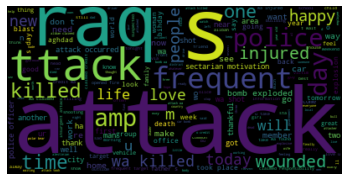

In [77]:
common_words=''
for i in df2['tweet_lemmatize']:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('worldcloud_MIXED.png')
plt.show()

## Building the New model 
According to the new dataset, same design as the previous one

In [78]:
X2.shape[1]

38

In [79]:
model2 = Sequential()
model2.add(Embedding(500, 120, input_length = X2.shape[1]))
model2.add(SpatialDropout1D(0.4))
model2.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(2,activation='softmax'))
model2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 38, 120)           60000     
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 38, 120)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 176)               209088    
                                                                 
 dense_1 (Dense)             (None, 2)                 354       
                                                                 
Total params: 269,442
Trainable params: 269,442
Non-trainable params: 0
_________________________________________________________________
None


In [80]:
pd.get_dummies(df2['label']).head(len(df2))

,0,1
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
55497,1,0
55498,1,0
55499,1,0
55500,0,1


In [81]:
y2=pd.get_dummies(df2['label']).head(len(df2))

## Splitting the dataset

In [82]:
#Splitting the data into training and testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.3, random_state = 42)

multiple call to tensor flow functions

In [83]:
import tensorflow as tf

In [84]:
tf.config.run_functions_eagerly(True)
#tf.data.experimental.enable_debug_mode()

## Fitting the 2nd model in same same design model

In [85]:
# batch_size=32
# history2 = model2.fit(X_train2, y_train2, validation_split=0.2, epochs = 5, batch_size=batch_size, verbose = 'auto')

took 31 mins 21 sec on GPU
<br>took 28 mins on GPU 

In [86]:
# model2.evaluate(X_test2,y_test2)

In [87]:
# model2.save('mixed.h5')
# model2.save('MixedDataset.h5')

#### RE-run code

In [88]:
! gdown 18cGRFT3YhpJ4SWQsHH28ozgKZ1GNgDhh #Mixed Dataset 

Downloading...
From: https://drive.google.com/uc?id=18cGRFT3YhpJ4SWQsHH28ozgKZ1GNgDhh
To: /content/MixedDataset.h5
100% 3.27M/3.27M [00:00<00:00, 273MB/s]


In [89]:
model2 = models.load_model('MixedDataset.h5')


## Evaluation/Accuracy

In [90]:
model2.evaluate(X_test2,y_test2)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


521/521 [==============================] - 82s 158ms/step - loss: 0.1470 - accuracy: 0.9491


[0.14695577323436737, 0.9491322040557861]

We get the accuracy as 94.91 % for the mixed dataset.

took 1.5 mins to evaluate

## Metrics
Plotting the metrics using the matplotlib.

In [91]:
# history_dict2 = history2.history
# print(history_dict2.keys())

##Accuracy Plot

In [92]:
# import matplotlib.pyplot as plt

# plt.plot(history2.history['accuracy'], label='acc')
# plt.plot(history2.history['val_accuracy'], label='val_acc')
# plt.legend()
# plt.show()

# plt.savefig("PlotOfAccuracy2.jpg")

##Loss Plot

In [93]:
# plt.plot(history2.history['loss'], label='loss')
# plt.plot(history2.history['val_loss'], label='val_loss')

# plt.legend()
# plt.show()

# plt.savefig("PlotOfLoss2.jpg")

## Prediction 

In [94]:
def predict_sentiment2(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=38)
    prediction_raw = model2.predict(tw)
    prediction = prediction_raw.round()[0].astype(int)[1]
    print("Predicted label: ", sentiment_label[1][prediction])
    return prediction_raw

In [95]:
test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment2(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment2(test_sentence2)

1/1 [==============================] - 0s 137ms/step
Predicted label:  Non-extremist
1/1 [==============================] - 0s 153ms/step
Predicted label:  Non-extremist


array([[0.9221251 , 0.07787491]], dtype=float32)

In [96]:
test_sentence3 = "I enjoyed my journey on this flight."
raw = predict_sentiment2(test_sentence3)
print(raw)

1/1 [==============================] - 0s 136ms/step
Predicted label:  Non-extremist
[[0.99373937 0.0062606 ]]


In [97]:
test_sentence4 = "I hate park when the slide in it are empty."
raw = predict_sentiment2(test_sentence4)
print(raw)

1/1 [==============================] - 0s 136ms/step
Predicted label:  Non-extremist
[[0.92635655 0.07364339]]


In [98]:
test_sentence5 = "I hate park when the slide in it are bombed."
raw = predict_sentiment2(test_sentence5)
print(raw)

1/1 [==============================] - 0s 141ms/step
Predicted label:  Non-extremist
[[0.92635655 0.07364339]]


In [99]:
test_sentence6 = "Many people were killed in the water park."
raw = predict_sentiment2(test_sentence6)
print(raw)

1/1 [==============================] - 0s 135ms/step
Predicted label:  Extremist
[[0.01310811 0.9868919 ]]
